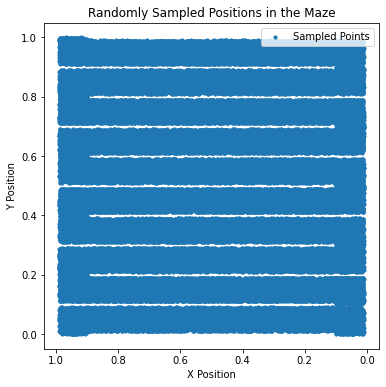

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
if module_path not in sys.path:
    sys.path.append(module_path)


from maze_env import MazeEnv
from maze import Maze

# Inizializza il labirinto e l'ambiente
maze = Maze(10, 10, 0, 0)  # Labirinto 10x10 con punto iniziale (0,0)
env = MazeEnv(sz=10, maze=maze, start=np.array([0.05, 0.05]), goal=np.array([0.95, 0.95]),
               reward="distance", log=False, eval=False, dt=0.1, horizon=100, 
               wall_penalty=10, slide=1, image_freq=100)

# Funzione per generare punti validi nel labirinto
def generate_positions(env, num_samples=500, max_attempts=5000):
    positions = set()
    attempts = 0
    
    while len(positions) < num_samples and attempts < max_attempts:
        state = env.sample_open_state_continuous()
        
        # Se il punto cade su un muro, scartalo e riprova
        if not env.point_collision(state[0], state[1]):
            positions.add(tuple(state))
        
        attempts += 1
    
    if len(positions) < num_samples:
        print(f"Warning: Only {len(positions)} unique positions generated out of {num_samples} requested.")
    
    return np.array(list(positions))

# Genera i punti
points_to_generate = 100000
positions = generate_positions(env, num_samples=points_to_generate, max_attempts=10*points_to_generate)

# Salva i punti in un DataFrame
df_positions = pd.DataFrame(positions, columns=["x", "y"])
df_positions.to_csv("positions.csv", index=False)

# Visualizza i punti nel labirinto
plt.figure(figsize=(6,6))
plt.scatter(df_positions["x"], df_positions["y"], s=10, label="Sampled Points")
# plt.ylim(0.99, 1.01)
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Randomly Sampled Positions in the Maze")
plt.show()
